###  Phân loại thể loại âm nhạc với Bộ dữ liệu:
> ### Vietnam Traditional Music (5 genres)
Trong nền âm nhạc, các chuyên gia đã lâu nay luôn nỗ lực tìm hiểu về âm thanh và những yếu tố tạo ra sự khác biệt giữa các bài hát. Họ cố gắng hiểu cách âm thanh được hình dung và điều gì tạo ra sự độc đáo của mỗi giai điệu. Bộ dữ liệu này được hy vọng sẽ cung cấp cơ hội để khám phá và nghiên cứu sâu hơn về vấn đề này.
Trong dự án này, chúng tôi khám phá thông tin cơ bản về dữ liệu âm thanh, cần thiết để sử dụng trong các mô hình Học máy và Học sâu.

> Để biết thêm thông tin về bộ dữ liệu, vui lòng sử dụng liên kết Kaggle sau:
https://www.kaggle.com/datasets/homata123/vntm-for-building-model-5-genres

### 0. Giới thiệu

#### Những điều chúng ta nên biết nếu làm việc với Dữ liệu âm thanh¶
*  Tần số (Hz) Mỗi ​​Âm thanh đều có một số loại Tần số bên trong nó. Chúng ta nên biết rằng Tần số:
* mô tả sự khác biệt về độ dài sóng.
* có thể được chia thành Tần số thấp và Tần số cao (Bước sóng ngắn và Bước sóng dài)

#### Cường độ (db / công suất) của Tệp Âm thanh Hiển thị mức độ cao của từng sóng đối với từng Tần số, do đó, nó mô tả sự thay đổi âm lượng:
* mô tả biên độ (chiều cao) của sóng
* được đo bằng db/công suất

#### Tốc độ lấy mẫu Tốc độ lấy mẫu là cách Máy tính đọc tệp âm thanh.
* đo tần suất các mẫu của tệp âm thanh
* chất lượng hoặc chi tiết của tệp âm thanh
* tốc độ mẫu cao nhận được nhiều chi tiết hơn về từng sóng trong tệp adio so với tốc độ mẫu thấp
* tốc độ mẫu nhất định là vì tai chúng ta có thể nghe được nhiều nhất ở tốc độ này

#### Các loại tệp âm thanh khác nhau Có nhiều loại tệp âm thanh:
mp3, wav, flac...

#### Lợi ích của Librosa¶
* cung cấp chức năng trợ giúp để chuyển đổi đa kênh thành đơn âm
* chuyển đổi Tỷ lệ mẫu thành 22050
#### Cách đọc tệp âm thanh
Với việc sử dụng gói glob, chúng ta có thể liệt kê tất cả các tệp trong các thư mục.

In [2]:
from glob import glob
audio_files = glob("/kaggle/input/vntm-for-building-model-5-genres/VNTM3/*/*.wav")

* Với việc sử dụng '*' (star), chúng ta có thể liệt kê tất cả các mục trong tập dữ liệu. Nó thay thế các ngôi sao bằng bất kỳ tệp nào tồn tại trong tập dữ liệu.

#### Cách nghe các tập tin âm thanh¶
Với việc sử dụng mô-đun hiển thị IPhytons, chúng ta có thể hiển thị các tệp âm thanh. Chúng tôi có một trình phát trong sổ ghi chép nơi chúng tôi có thể nghe tệp âm thanh. Lưu ý rằng chúng tôi thực sự chưa đọc trong tệp và chưa thể thao tác với nó.

In [ ]:
import IPython
import IPython.display as ipd 
ipd.Audio(audio_files[0])

#### Cách tải tập tin âm thanh¶
Ở đây chúng tôi sử dụng librosa và hàm Load() của nó để đọc các tệp âm thanh. Chúng tôi lưu kết quả đầu ra là 'y' và sr':

* y: dữ liệu thô của tệp âm thanh (mảng có nhiều mảng)
*  sr: giá trị nguyên của tốc độ mẫu

In [4]:
import librosa
y, sr = librosa.load(audio_files[0])
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

Y is a numpy array: [-0.01080322 -0.01104736 -0.0088501  ...  0.03442383  0.03469849
  0.03317261]
Shape of Y: (661500,)
Sample Rate: 22050


Chúng ta có thể thấy rằng dữ liệu thô của các tệp âm thanh (y) của chúng ta là các mảng có nhiều mảng và trong trường hợp này Tốc độ mẫu (sr) của chúng ta là 22050.

#### Cách vẽ biểu đồ các tệp âm thanh
Một cách để vẽ biểu đồ mảng dữ liệu âm thanh gốc là chúng ta chỉ cần chuyển nó thành chuỗi pandas và sử dụng hàm plot().

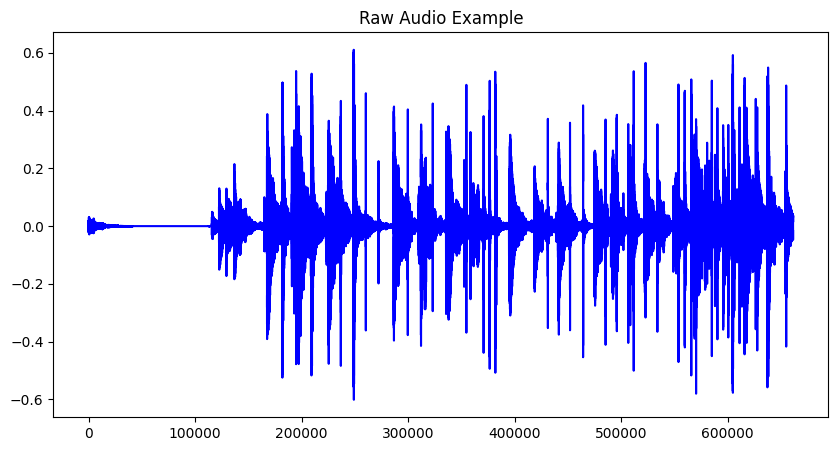

In [5]:
import pandas as pd
pd.Series(y).plot(figsize=(10,5), title="Raw Audio Example", color='blue');

Chúng ta cũng có thể sử dụng hàm display.waveshow() của thư viện librosa.

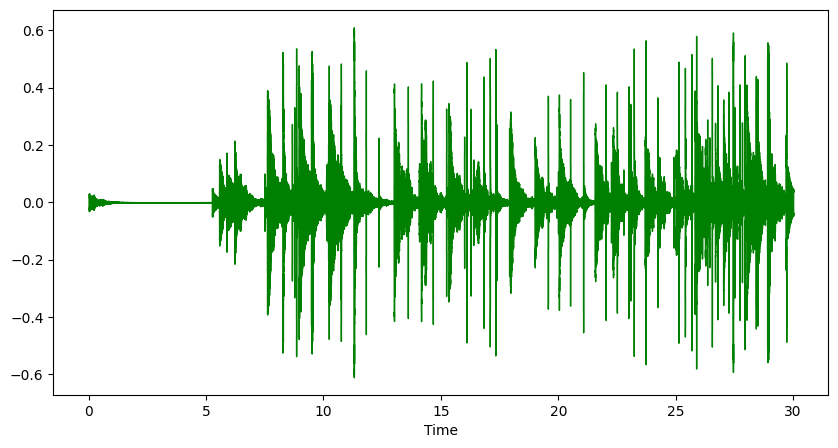

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, color = "Green")
plt.show()

Chúng ta muốn đi sâu hơn bằng cách xem xét các tần số khác nhau và cường độ của chúng.
Để làm điều này, chúng ta áp dụng phép biến đổi Fourier cho dữ liệu âm thanh. Điều này cho phép chúng ta trích xuất ra các tần số nào đang phát ra ở các phần khác nhau trong tệp âm thanh. Chúng ta sử dụng hàm stft() (Short-time Fourier Transform) để thực hiện điều này.
Sau đó, chúng ta áp dụng hàm amplitude_to_db cho kết quả của STFT, đây là một phép biến đổi thường được sử dụng cho dữ liệu âm thanh để chuyển đổi các giá trị amplitude thành đơn vị decibel (db).
Với điều này, chúng ta có dữ liệu mà chúng ta có thể cung cấp cho các mô hình Machine Learning thông thường.

In [7]:
import numpy as np
D = librosa.stft(y)
# chuyển đổi từ biên độ sang giá trị decibel bằng cách lấy giá trị tuyệt đối của D và tham chiếu đến giá trị lớn nhất có thể
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# xem hình dạng của dữ liệu đã được biến đổi
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 1292)


#### Plotting Audio File as a Spectrogram¶
A spectrogram là một biểu đồ trực quan của phổ tần số trong một âm thanh hoặc tín hiệu khác khi nó thay đổi theo thời gian. Biểu đồ kết quả là một biểu đồ hai chiều, với tần số trên trục đứng và thời gian trên trục ngang. Spectrograms thường được sử dụng trong phân tích và xử lý tín hiệu âm thanh, đặc biệt là trong lĩnh vực âm nhạc, nói và âm thanh.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

#### Create a Mel Spectrogram (Melodic Spectrogram)¶
Một Mel spectrogram là một loại spectrogram đại diện cho nội dung phổ của một âm thanh hoặc tín hiệu trên một thang đo dựa trên âm sắc cảm nhận được của các tần số khác nhau. Thang đo Mel là một thang đo logarithmic ánh xạ tần số thành âm thanh một cách gần gũi hơn với cách hệ thống thính giác của con người cảm nhận âm thanh.

In [9]:
# Tạo Mel Spectrogram 
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2)
print("Shape of Mel Spectogram", S.shape)
# Chuyển đổi biên độ sang giá trị decibel
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (256, 1292)


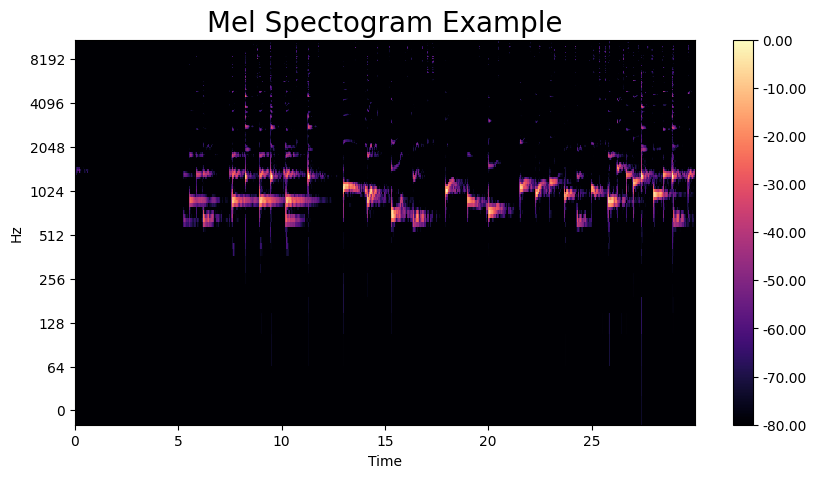

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

### 1. Import các thư viện cần thiết


In [11]:
import numpy as np
import librosa
import os
import time
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

###  2. Đọc dữ liệu, tiền xử lí dữ liệu

#### a. Đoạn mã duyệt qua thư mục chứa dữ liệu âm nhạc và in danh sách các tệp thư mục con

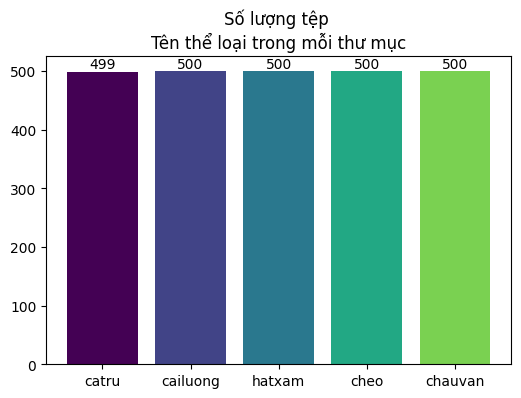

In [12]:
dir_path = '/kaggle/input/vntm-for-building-model-5-genres/VNTM3'
genres = os.listdir(dir_path)
plt.figure(figsize=(6, 4))
for i, genre in enumerate(genres):
    genre_path = os.path.join(dir_path, genre)
    num_files = len(os.listdir(genre_path))
    plt.bar(genre, num_files, color=plt.cm.viridis(i / len(genres)))
    plt.text(genre, num_files, str(num_files), ha='center', va='bottom')
plt.title('Số lượng tệp \nTên thể loại trong mỗi thư mục')
plt.show()

#### b. Tiền xử lý dữ liệu


* Xử lý nhiễu

In [14]:
def reduce_noise(y, sr):
    # Áp dụng bộ lọc trung bình đơn giản để giảm nhiễu
    y_filtered = librosa.effects.median(y, width=3)
    return y_filtered

>  #### Feature Extraction
* Các đặc trưng cơ bản như Spectral Centroid, Spectral Rolloff, Spectral Flux, Zero-crossings, và Low-Energy mỗi đều có 2 giá trị trung bình và độ lệch chuẩn, tạo ra tổng cộng 10 đặc trưng.
* Các hệ số MFCC được tính toán với 13 hệ số, nhưng bạn chỉ chọn 5 đặc trưng đầu tiên từ mỗi hệ số MFCC, do đó tạo ra 10 đặc trưng 

In [59]:
def extract_features(file_path):
    try:
        # Load tệp âm thanh và chia thành cửa sổ tín hiệu
        y, sr = librosa.load(file_path, sr=22050)
        n_fft = 512  # Kích thước cửa sổ FFT
        hop_length = 256  # Khoảng cách giữa các frame
        
        # Tính STFT và các đặc trưng liên quan đến âm sắc
        # Đặc trưng 1 : Spectral Centroid
        stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
        spectral_centroid = librosa.feature.spectral_centroid(S=stft**2, sr=sr)[0]
        # Đặc trưng 2: Spectral Rolloff
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
        # Đặc trưng 3: Spectral Flux
        flux = librosa.onset.onset_strength(y=y, sr=sr)
        # Đặc trưng 4: Zero-crossings
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]
        # Đặc trưng 5: Low-Energy
        rms = librosa.feature.rms(y=y)[0]
        # Đặc trưng 6: Các hệ số MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length, n_mels=128)
        
        # Trích xuất các giá trị trung bình và độ lệch chuẩn của các đặc trưng
        mean_spectral_centroid = np.mean(spectral_centroid)
        std_spectral_centroid = np.std(spectral_centroid)
        mean_rolloff = np.mean(rolloff)
        std_rolloff = np.std(rolloff)
        mean_flux = np.mean(flux)
        std_flux = np.std(flux)
        mean_zero_crossing_rate = np.mean(zero_crossing_rate)
        std_zero_crossing_rate = np.std(zero_crossing_rate)
        mean_low_energy = np.mean(rms)
        low_energy = np.mean(rms < mean_low_energy)
        mfcc_mean = np.mean(mfcc, axis=1)[:5]  # Chỉ lấy 5 đặc trưng đầu của MFCC
        mfcc_std = np.std(mfcc, axis=1)[:5]    # Chỉ lấy 5 đặc trưng đầu của MFCC
        
        # Tạo vector đặc trưng bao gồm cả MFCC
        feature_vector = np.array([
            mean_spectral_centroid, std_spectral_centroid,
            mean_rolloff, std_rolloff,
            mean_flux, std_flux,
            mean_zero_crossing_rate, std_zero_crossing_rate,
            mean_low_energy,low_energy,
        ])
        
        # Thêm MFCC vào vector đặc trưng
        feature_vector = np.concatenate((feature_vector, mfcc_mean, mfcc_std))
        
        return feature_vector
    # Xử lý ngoại lệ
    except Exception as e:
        print("Error extracting features:", str(e))
        return None

#### Quá trình trích xuất đặc trưng âm thanh và chuẩn bị dữ liệu

In [61]:
def process_directory(dir_path):
    X = []  # Danh sách để lưu các đặc trưng âm nhạc
    Y = []  # Danh sách để lưu nhãn tương ứng với mỗi bài hát
    # Duyệt qua tất cả các thư mục và tập tin trong dir_path
    for subdir, _, files in os.walk(dir_path):
        files.sort()  # Sắp xếp các file âm nhạc theo thứ tự
        for file in tqdm(files, desc="Processing subdirectory"):
            if file.endswith(('.wav','.mp3', '.flac')):  
                file_path = os.path.join(subdir, file)  # Đường dẫn đầy đủ đến file âm nhạc
                features = extract_features(file_path)  # Trích xuất các đặc trưng từ file âm nhạc
                if features is not None:
                    label = os.path.basename(subdir)  # Nhãn là tên thư mục chứa file âm nhạc
                    X.append(features)  # Thêm các đặc trưng vào danh sách X
                    Y.append(label)  # Thêm nhãn tương ứng vào danh sách Y
    return np.array(X), np.array(Y)  # Trả về các đặc trưng và nhãn dưới dạng mảng NumPy

In [62]:
DIR = '/kaggle/input/vntm-for-building-model-5-genres/VNTM3'
# Tải và xử lý dữ liệu âm nhạc từ thư mục DIR
X, Y = process_directory(DIR)

Processing subdirectory: 0it [00:00, ?it/s]
Processing subdirectory: 100%|██████████| 500/500 [02:42<00:00,  3.07it/s]


Thông báo này cho biết rằng dữ liệu đang được xử lý từng thư mục một, với tiến trình được hiển thị dưới dạng phần trăm.

#### c. Lưu trữ lại các đặc trưng

In [63]:
# Đặt tên cho các đặc trưng
features_df = pd.DataFrame(X)
# Thêm cột nhãn vào DataFrame
features_df['label'] = Y[:len(features_df)]  # Đảm bảo độ dài của nhãn khớp với số đặc trưng
# Lưu DataFrame vào tệp CSV
features_df.to_csv('features.csv', index=False)
print("Đã lưu các đặc trưng và nhãn vào tệp 'features.csv'.")

Đã lưu các đặc trưng và nhãn vào tệp 'features.csv'.


#### d. Sử dụng StandardScaler để chuẩn hóa các đặc trưng

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Số lượng đặc trưng: {X_scaled.shape[1]}")

Số lượng đặc trưng: 20


In [65]:
import joblib
# Lưu lại trọng số của sau khi chuẩn hóa
joblib.dump(scaler, 'feature_scaler.pkl')

['feature_scaler.pkl']

In [66]:
print("Extracted features:")
for i, feature_vector in enumerate(X_scaled[:5]):
    print(f"Feature vector {i+1}: {feature_vector}")

Extracted features:
Feature vector 1: [ 1.26785078  1.6472677   1.05249652  0.49012654  1.92996488  2.01250169
  1.2608589   1.58645033 -0.37512042  1.97804911 -0.65990578 -1.27746161
  0.39499428  1.06547929 -0.02099596  2.16941764  0.45832498  1.37356941
 -0.64372184  1.122876  ]
Feature vector 2: [ 1.59482371  1.07419229  0.74918452  0.16917407  1.31370115  1.69631526
  1.48156715  1.10280817 -0.15845914  0.67036532 -0.22919629 -1.15331546
 -0.15386153  0.9298692   0.01244353  1.95261358  0.48068776  1.25294937
 -0.54593247  0.25232102]
Feature vector 3: [ 1.07653352  1.09982447  1.27117278  0.30681665  2.28957446  1.79113819
  1.01532775  0.79886193 -0.74103488  1.76010181 -0.54018023 -1.20246514
  0.19899538  1.22079755  0.10801264  1.24303735  0.43596041  1.60092882
 -0.95750254 -0.47604798]
Feature vector 4: [ 0.96349712  0.99324375  0.72269212  0.2752892   0.89238951  1.88498745
  1.09414438  1.00793187 -0.78595627  1.47404598 -0.5543742  -0.96470701
  0.32640061  1.36294523  0

#### Chia dữ liệu thành tập huấn luyện và tập kiểm tra sử dụng hàm train_test_split

Trong quá trình huấn luyện mô hình, chúng tôi đã tiến hành một loạt các bước tiền xử lý dữ liệu, bao gồm chuẩn hóa dữ liệu để đảm bảo tính ổn định và đồng nhất trong mọi điều kiện. Việc này đặc biệt quan trọng đối với các thuật toán như K-Nearest Neighbors và Support Vector Machines. Tuy nhiên, chúng tôi cũng đã thử nghiệm với cả dữ liệu đã chuẩn hóa và chưa chuẩn hóa để đảm bảo rằng quá trình chuẩn hóa không ảnh hưởng đến hiệu suất của mô hình. Kết quả của quá trình này sẽ cung cấp thông tin quan trọng về cách dữ liệu được xử lý và làm thế nào mô hình đáp ứng với điều này

### 3. Sử dụng K-Nearest Neighbor (KNN) để giải quyết bài toán.

#### a. Huấn luyện với dữ liệu chưa chuẩn hóa

In [69]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state=42)
# Huấn luyện mô hình với dữ liệu không chuẩn hóa
knn_m1 = KNeighborsClassifier(n_neighbors=6, metric='euclidean', weights='distance')
knn_m1.fit(X_tr, y_tr)
y_pred_m1 = knn_m1.predict(X_te)

# Đánh giá mô hình
print("Độ chính xác:", accuracy_score(y_te, y_pred_m1))
print("Đánh giá mô hình với dữ liệu không chuẩn hóa")
print(classification_report(y_te, y_pred_m1))

Độ chính xác: 0.752
Đánh giá mô hình với dữ liệu không chuẩn hóa
              precision    recall  f1-score   support

    cailuong       0.78      0.72      0.75       137
       catru       0.83      0.87      0.85       158
     chauvan       0.62      0.69      0.66       143
        cheo       0.83      0.76      0.79       152
      hatxam       0.71      0.71      0.71       160

    accuracy                           0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.76      0.75      0.75       750



#### a1.phương pháp cross-validation với các giá trị khác nhau của k từ 1 đến 10

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


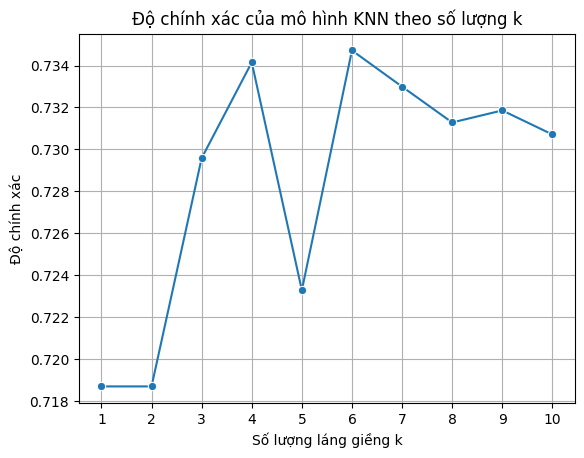

In [70]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
# Đánh giá độ chính xác của model tốt nhất trên tập dữ liệu huấn luyện
k_values = range(1, 11)
scores = []
for k in k_values:
    knn_m1.n_neighbors = k 
    score = cross_val_score(knn_m1, X_tr, y_tr, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x=k_values, y=scores, marker='o')
plt.title('Độ chính xác của mô hình KNN theo số lượng k')
plt.xlabel('Số lượng láng giềng k')
plt.ylabel('Độ chính xác')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Nhận xét
* Khi huấn luyện mô hình mà không sử dụng chuẩn hóa dữ liệu, kết quả có thể bị ảnh hưởng bởi sự không đồng nhất trong phạm vi và phân phối của các đặc trưng đầu vào.
* Do đó, để cải thiện hiệu suất của mô hình chúng ta sẽ dùng chuẩn hóa  trước đó.

#### b. Huấn luyện dữ liệu với dặc trưng được chuẩn hóa

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print("Số lượng mẫu trong dữ liệu huấn luyện:", len(X_train))
print("Số lượng nhãn trong dữ liệu huấn luyện:", len(y_train))
print("Số lượng mẫu trong dữ liệu kiểm tra:", len(X_test))
print("Số lượng nhãn trong dữ liệu kiểm tra:", len(y_test))

Số lượng mẫu trong dữ liệu huấn luyện: 1999
Số lượng nhãn trong dữ liệu huấn luyện: 1999
Số lượng mẫu trong dữ liệu kiểm tra: 500
Số lượng nhãn trong dữ liệu kiểm tra: 500


#### c. Grid search

> Thực hiện tìm kiếm siêu tham số cho mô hình KNN (K-Nearest Neighbors) nhằm tối ưu hóa hiệu suất của mô hình trên dữ liệu huấn luyện. Grid Search CV là một phương pháp phổ biến để thực hiện việc này, bằng cách thử tất cả các tổ hợp có thể của các giá trị tham số đã xác định trước trên các tập dữ liệu cross-validation. Điều này giúp xác định ra các giá trị siêu tham số tốt nhất cho mô hình

In [96]:
import time
from sklearn.model_selection import GridSearchCV
time_train = [] # Khởi tạo danh sách để lưu trữ thời gian huấn luyện
# Khởi tạo mô hình KNN và định nghĩa các tham số cần tìm kiếm
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,6,7,8,9,10],  # Số lượng hàng xóm
    'weights': ['uniform', 'distance'], # Trọng số
    'metric': ['euclidean', 'manhattan', 'cosine']  # Khoảng cách
}
# Thực hiện tìm kiếm siêu tham số và đánh giá mô hình
t0 = time.process_time() # Bắt đầu đo thời gian

# Khởi tạo GridSearchCV và huấn luyện
grid_search = GridSearchCV(knn, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

t1 = time.process_time() - t0 # Kết thúc đo thời gian
time_train.append(t1) # Lưu thời gian huấn luyện vào danh sách

print("Thông số tốt nhất được tìm thấy: ", grid_search.best_params_)
print("Độ chính xác tốt nhất được tìm thấy trên tập huấn luyện: ", grid_search.best_score_)
print(f"Thời gian huấn luyện của mô hình KNN: {time_train[0]:.2f} seconds")
# Lấy model tốt nhất từ GridSearchCV và đánh giá trên tập kiểm tra
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Độ chính xác của model tốt nhất trên tập kiểm tra: {test_accuracy * 100:.2f}%")

Thông số tốt nhất được tìm thấy:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Độ chính xác tốt nhất được tìm thấy trên tập huấn luyện:  0.9474674185463658
Thời gian huấn luyện của mô hình KNN: 0.30 seconds
Độ chính xác của model tốt nhất trên tập kiểm tra: 94.80%


#### d. Khởi tạo một mô hình phân loại KNN với các siêu tham số được tìm thấy

In [97]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan',weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

#### e. Đánh giá độ chính xác của mô hình trên tập kiểm tra với các giá trị khác nhau của k.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


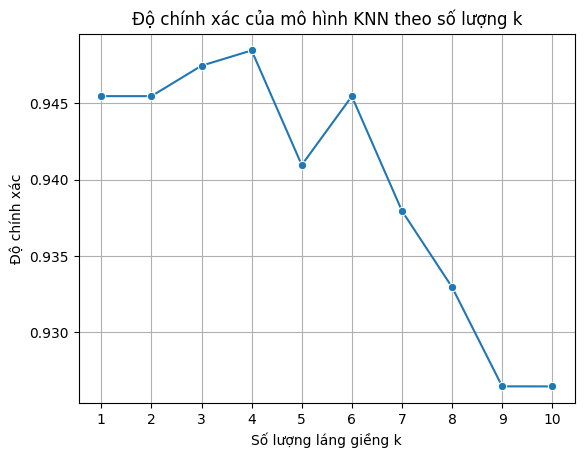

In [98]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
# Đánh giá độ chính xác của model tốt nhất trên tập dữ liệu huấn luyện
k_values = range(1, 11)
scores = []
for k in k_values:
    knn.n_neighbors = k 
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x=k_values, y=scores, marker='o')
plt.title('Độ chính xác của mô hình KNN theo số lượng k')
plt.xlabel('Số lượng láng giềng k')
plt.ylabel('Độ chính xác')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### f. Đánh giá mô hình với ma trận nhầm lẫn

Chúng ta sẽ xem xét một số lỗi của mô hình dự huấn luyện được. Một số lỗi dễ dàng được phát hiện bằng confusion matrix thể hiện xác xuất/số ảnh bị phân loại nhầm thành lớp khác.

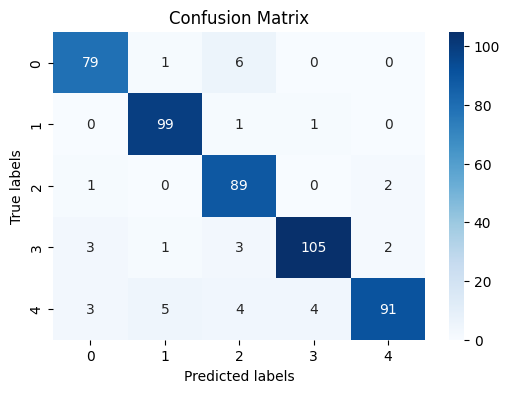

[[ 79   1   6   0   0]
 [  0  99   1   1   0]
 [  1   0  89   0   2]
 [  3   1   3 105   2]
 [  3   5   4   4  91]]


In [99]:
from sklearn.metrics import confusion_matrix, classification_report
# Dự đoán nhãn trên tập dữ liệu kiểm tra
y_pred = knn.predict(X_test)
# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
#tick_labels = ["cailuong", "catru", "chauvan", "cheo", "hatxam"]
#plt.xticks(ticks=np.arange(len(tick_labels)) + 0.5, labels=tick_labels)
#plt.yticks(ticks=np.arange(len(tick_labels)) + 0.5, labels=tick_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(conf_matrix)

> Nhãn gán: 0: "cailuong", 1: "catru", 2: "chauvan", 3: "cheo", 4: "hatxam"

Các giá trị trên đường chéo rất cao, chúng ta mô hình chúng ta có độ chính xác rất tốt. Nhìn vào confusion matrix ở trên, chúng ta có một số nhận xét như sau:
* Nhãn "cailuong": Có 79 mẫu được dự đoán đúng, 1 mẫu bị dự đoán nhầm thành "catru", và 6 mẫu bị dự đoán nhầm thành "chauvan".
* Nhãn "catru": Có 99 mẫu được dự đoán đúng, 1 mẫu bị dự đoán nhầm thành "cailuong", và 1 mẫu bị dự đoán nhầm thành "chauvan".
* Nhãn "chauvan": Có 89 mẫu được dự đoán đúng, 1 mẫu bị dự đoán nhầm thành "cailuong", và 2 mẫu bị dự đoán nhầm thành "hatxam".
* Nhãn "cheo": Có 105 mẫu được dự đoán đúng, 3 mẫu bị dự đoán nhầm thành "cailuong", 1 mẫu bị dự đoán nhầm thành "catru", 3 mẫu bị dự đoán nhầm thành "hatxam", và 3 mẫu bị dự đoán nhầm thành "chauvan".
* Nhãn "hatxam": Có 91 mẫu được dự đoán đúng, 3 mẫu bị dự đoán nhầm thành "cailuong", 5 mẫu bị dự đoán nhầm thành "catru", 4 mẫu bị dự đoán nhầm thành "cheo", và 4 mẫu bị dự đoán nhầm thành "chauvan".

#### Hiển thị một số trường hợp bị sai¶
Để có cái nhìn rõ hơn về một số mẫu bị sai, chúng ta quan sát top các mẫu có giá trị dự đoán khác nhất so với nhãn thật

In [100]:
import IPython.display as ipd
# Chọn một số mẫu sai từ tập dữ liệu kiểm tra
num_samples_to_display = 5
incorrect_indices = np.where(y_pred != y_test)[0]
incorrect_samples = X_test[incorrect_indices[:num_samples_to_display]]
# Hiển thị mẫu sai bằng cách nghe âm thanh
for i, audio_sample in enumerate(incorrect_samples):
    print(f"True label: {y_test[incorrect_indices[i]]}, Predicted label: {y_pred[incorrect_indices[i]]}")
    ipd.display(ipd.Audio(audio_sample, rate=44100))  # rate 44100 là mặc định cho âm thanh

True label: cheo, Predicted label: catru


True label: hatxam, Predicted label: cailuong


True label: chauvan, Predicted label: cailuong


True label: hatxam, Predicted label: catru


True label: cheo, Predicted label: chauvan


#### g. Chỉ số đánh giá mô hình: Precision, recall và F1-score 

In [101]:
report = classification_report(y_test, y_pred)
print("\nBáo cáo phân loại cho mô hình:")
print(report)


Báo cáo phân loại cho mô hình:
              precision    recall  f1-score   support

    cailuong       0.92      0.92      0.92        86
       catru       0.93      0.98      0.96       101
     chauvan       0.86      0.97      0.91        92
        cheo       0.95      0.92      0.94       114
      hatxam       0.96      0.85      0.90       107

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



#### Lưu lại mô hình

In [102]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

Vẽ biểu đồ học tập (learning curves) để xem sự chênh lệch giữa lỗi huấn luyện và lỗi kiểm tra khi thay đổi kích thước tập dữ liệu.

### 4. Sử dụng Support Vector Machines (SVM) để giải quyết bài toán.

Các bước thực hiện tương tự như ở mô hình KNN

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
# Khởi tạo mô hình SVM
svm = SVC()
# Thiết lập các siêu tham số cần tìm kiếm
params = {
    'C': [0.1, 1, 10, 100],  # Tham số điều chuẩn
    'kernel': ['linear', 'rbf'],  # Kernel SVM: tuyến tính và RBF
    'gamma': ['scale', 'auto']  # Hệ số gamma cho kernel RBF
}
t0 = time.process_time()
# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất
grid_search = GridSearchCV(svm, params, cv=5, n_jobs=-1)
# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid_search.fit(Xtrain, ytrain)
t1 = time.process_time() - t0
time_train.append(t1)
# In ra các siêu tham số tốt nhất được tìm thấy
print("Thông số tốt nhất được tìm thấy: ", grid_search.best_params_)
# In ra độ chính xác tốt nhất trên tập huấn luyện
print("Độ chính xác tốt nhất được tìm thấy trên tập huấn luyện: ", grid_search.best_score_)
print(f"Thời gian huấn luyện của mô hình SVM: {time_train[0]:.2f} seconds")
# Lấy mô hình tốt nhất từ GridSearchCV
best_svm = grid_search.best_estimator_
# Đánh giá mô hình tốt nhất trên tập kiểm tra
test_accuracy = best_svm.score(Xtest, ytest)
print(f"Độ chính xác của mô hình tốt nhất trên tập kiểm tra: {test_accuracy * 100:.2f}%")

Thông số tốt nhất được tìm thấy:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Độ chính xác tốt nhất được tìm thấy trên tập huấn luyện:  0.9594786967418546
Thời gian huấn luyện của mô hình SVM: 0.30 seconds
Độ chính xác của mô hình tốt nhất trên tập kiểm tra: 96.60%


In [104]:
svm = SVC(C=10, gamma='scale', kernel='rbf')
svm.fit(Xtrain, ytrain)

SVC(C=10)

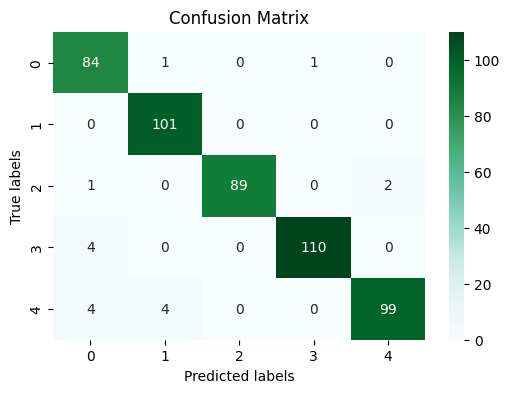

Báo cáo phân loại cho mô hình SVM:
              precision    recall  f1-score   support

    cailuong       0.90      0.98      0.94        86
       catru       0.95      1.00      0.98       101
     chauvan       1.00      0.97      0.98        92
        cheo       0.99      0.96      0.98       114
      hatxam       0.98      0.93      0.95       107

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

[[ 84   1   0   1   0]
 [  0 101   0   0   0]
 [  1   0  89   0   2]
 [  4   0   0 110   0]
 [  4   4   0   0  99]]


In [105]:
# Dự đoán nhãn trên tập dữ liệu kiểm tra
y_pred_svm = svm.predict(Xtest)
# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(ytest, y_pred_svm)
# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuGn")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# In báo cáo phân loại cho mô hình SVM
print("Báo cáo phân loại cho mô hình SVM:")
print(classification_report(ytest, y_pred_svm))
print(conf_matrix)

In [106]:
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

## 5. So sánh hiệu quả của 2 thuật toán.

#### a. Về thời gian

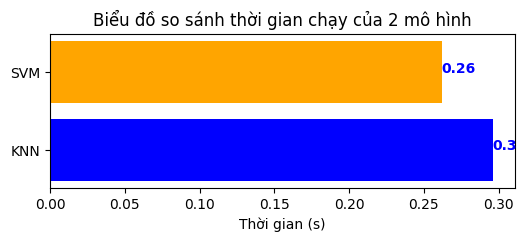

In [107]:
# So sánh thời gian huấn luyện của hai mô hình
names = ['KNN', 'SVM']
plt.figure(figsize=(6, 2))
plt.barh(names, time_train, color=['blue', 'orange'])
plt.title("Biểu đồ so sánh thời gian chạy của 2 mô hình")
plt.xlabel("Thời gian (s)")
for i, v in enumerate(time_train):
    plt.text(v, i, str(round(v, 2)), color='blue', fontweight='bold')
plt.show()

#### b.Về kết quả dự đoán

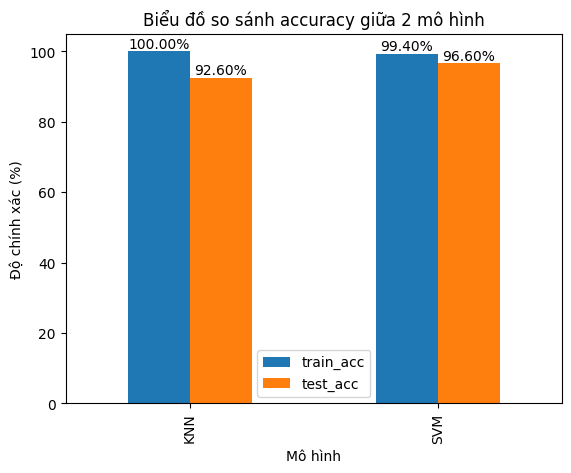

KNN Train Accuracy: 100.00%
KNN Test Accuracy: 92.60%
SVM Train Accuracy: 99.40%
SVM Test Accuracy: 96.60%


In [108]:
# Tính độ chính xác trên tập huấn luyện của mỗi mô hình
train_acc = [accuracy_score(y_train, knn.predict(X_train)),accuracy_score(ytrain, svm.predict(Xtrain))]

# Tính độ chính xác trên tập kiểm tra của mỗi mô hình
test_acc = [accuracy_score(y_test, knn.predict(X_test)),accuracy_score(ytest, svm.predict(Xtest))]

# Tạo DataFrame với độ chính xác trên cả tập huấn luyện và tập kiểm tra của mỗi mô hình
acc = pd.DataFrame({"train_acc":train_acc,"test_acc": test_acc})
acc.index = names
acc = acc*100
# Vẽ biểu đồ cột so sánh độ chính xác giữa hai mô hình
ax = acc.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f%%')
plt.xlabel("Mô hình")
plt.ylabel("Độ chính xác (%)")
plt.title("Biểu đồ so sánh accuracy giữa 2 mô hình")
plt.show()
# In độ chính xác của mỗi mô hình
for name, train, test in zip(names, train_acc, test_acc):
    print(f"{name} Train Accuracy: {train * 100:.2f}%")
    print(f"{name} Test Accuracy: {test * 100:.2f}%")

Nhận xét:¶
* mô hình KNN có độ chính xác trên tập huấn luyện là 100.00% và trên tập kiểm tra là 94.80%. Điều này cho thấy mô hình có khả năng phân loại tốt trên tập dữ liệu mới, mặc dù có một chút overfitting (quá mức tương thích với dữ liệu huấn luyện) trên tập huấn luyện.



* Mô hình KNN tuy kết quả train cao hơn của SVM một chút(hơn khoảng 0.6%), nhưng bị overfitting và kết quả accuracy trên tập test cũng không cao bằng


Nhận xét:¶
* SVM có độ chính xác trên tập huấn luyện là 99.40% và trên tập kiểm tra là 95.20%. Đây cũng là kết quả ấn tượng, chỉ ra rằng mô hình SVM cũng đạt được hiệu suất cao và không có overfitting nhiều như KNN

* Mô hình KNN tuy kết quả train cao hơn của SVM, nhưng bị overfitting và kết quả accuracy trên tập test cũng không cao bằng

## 6.Dự đoán

In [111]:
import numpy as np
import os
import librosa
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Load mô hình KNN và bộ chuẩn hóa từ các tệp pickle đã lưu trước đó
svm = joblib.load('svm_model.pkl')
scaler = joblib.load('feature_scaler.pkl')

def extract_features(file_path):
    try:
        # Load tệp âm thanh và chia thành cửa sổ tín hiệu
        y, sr = librosa.load(file_path, sr=22050)
        n_fft = 512  # Kích thước cửa sổ FFT
        hop_length = 256  # Khoảng cách giữa các frame
        
        # Tính STFT và các đặc trưng liên quan đến âm sắc
        # Đặc trưng 1 : Spectral Centroid
        stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
        spectral_centroid = librosa.feature.spectral_centroid(S=stft**2, sr=sr)[0]
        # Đặc trưng 2: Spectral Rolloff
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
        # Đặc trưng 3: Spectral Flux
        flux = librosa.onset.onset_strength(y=y, sr=sr)
        # Đặc trưng 4: Zero-crossings
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]
        # Đặc trưng 5: Low-Energy
        rms = librosa.feature.rms(y=y)[0]
        # Đặc trưng 6: Các hệ số MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length, n_mels=128)
        
        # Trích xuất các giá trị trung bình và độ lệch chuẩn của các đặc trưng
        mean_spectral_centroid = np.mean(spectral_centroid)
        std_spectral_centroid = np.std(spectral_centroid)
        mean_rolloff = np.mean(rolloff)
        std_rolloff = np.std(rolloff)
        mean_flux = np.mean(flux)
        std_flux = np.std(flux)
        mean_zero_crossing_rate = np.mean(zero_crossing_rate)
        std_zero_crossing_rate = np.std(zero_crossing_rate)
        mean_low_energy = np.mean(rms)
        low_energy = np.mean(rms < mean_low_energy)
        mfcc_mean = np.mean(mfcc, axis=1)[:5]  # Chỉ lấy 5 đặc trưng đầu của MFCC
        mfcc_std = np.std(mfcc, axis=1)[:5]    # Chỉ lấy 5 đặc trưng đầu của MFCC
        
        # Tạo vector đặc trưng bao gồm cả MFCC
        feature_vector = np.array([
            mean_spectral_centroid, std_spectral_centroid,
            mean_rolloff, std_rolloff,
            mean_flux, std_flux,
            mean_zero_crossing_rate, std_zero_crossing_rate,
            mean_low_energy,low_energy,
        ])
        
        # Thêm MFCC vào vector đặc trưng
        feature_vector = np.concatenate((feature_vector, mfcc_mean, mfcc_std))
        
        return feature_vector
    # Xử lý ngoại lệ
    except Exception as e:
        print("Error extracting features:", str(e))
        return None
# Danh sách các đường dẫn đến các file âm thanh bạn muốn dự đoán
file_paths = [
    "/kaggle/input/vntm-for-building-model-5-genres/VNTM3/cailuong/CaiLuong.385.wav",
    "/kaggle/input/vntm-for-building-model-5-genres/VNTM3/catru/Catru.125.wav",
    "/kaggle/input/vntm-for-building-model-5-genres/VNTM3/chauvan/Chauvan.110.wav",
    "/kaggle/input/vntm-for-building-model-5-genres/VNTM3/cheo/Cheo.281.wav",
    "/kaggle/input/vntm-for-building-model-5-genres/VNTM3/hatxam/Xam.090.wav",
    "/kaggle/input/vntm-for-building-model-5-genres/VNTM3/cheo/Cheo.281.wav"
    # Thêm các đường dẫn khác nếu cần
]

# Duyệt qua từng đường dẫn và dự đoán thể loại của từng file
for file_path in file_paths:
    # Trích xuất đặc trưng của file âm thanh
    song_features = extract_features(file_path)
    
    # Chuẩn hóa đặc trưng của file âm thanh
    song_features_scaled = scaler.transform(song_features.reshape(1, -1))
    
    # Dự đoán thể loại của file âm thanh bằng mô hình KNN đã được tải
    #predicted_prob = knn_model.predict_proba(song_features_scaled)# dòng này chỉ dùng cho knn
    predicted_label =svm.predict(song_features_scaled)
    
    # Hiển thị kết quả dự đoán
    print("Predicted genre:", predicted_label[0])
    #print("Confidence:", np.max(predicted_prob) * 100, "%")

Predicted genre: cailuong
Predicted genre: catru
Predicted genre: chauvan
Predicted genre: cheo
Predicted genre: hatxam
Predicted genre: cheo
